# Case 2 Resolution

## *Leonardo Ieracitano Vieira*

Welcome to the resolution of case 2. If you want to view a specific question, browse the index that we built below.

# Summary

1. [Question 1](#question1)

2. [Question 2](#question2)

3. [Question 3](#question3)

4. [Question 4](#question4)

5. [Question 5](#question5)

6. [Question 6 - Model Estimations](#question6)

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')

In [3]:
filePath = r"C:\Users\leona\Downloads\Challenge_4i\data_comexstat.csv"
dataset = pd.read_csv(filePath, sep = ',', encoding='latin-1')

In [4]:
dataset.head()

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0


In [5]:
print(f'The file has {dataset.shape[0]} rows and {dataset.shape[1]} columns.')

The file has 117965 rows and 8 columns.


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     117965 non-null  object 
 1   product  117965 non-null  object 
 2   state    117965 non-null  object 
 3   country  117965 non-null  object 
 4   type     117965 non-null  object 
 5   route    117965 non-null  object 
 6   tons     117965 non-null  float64
 7   usd      117965 non-null  float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


*Before we start let's create some auxiliary fields for date and, additionally, leave our base indexed. This will make our job easier if we need to aggregate series or make graphics. We chose to present the results in billions of dollars, so that the scale of the graphs is more visually adequate.*

In [7]:
dataset['date'] = pd.to_datetime(dataset['date'], format = '%Y-%m-%d')
dataset.index = dataset['date']
dataset['month'] = dataset['date'].dt.month
dataset['year'] = dataset['date'].dt.year
dataset['year_month'] = dataset['year'].map(str) + '_' + dataset['month'].map(str)

# Question 1 <a name = "question1"></a>

Show the evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’.

## Soybeans

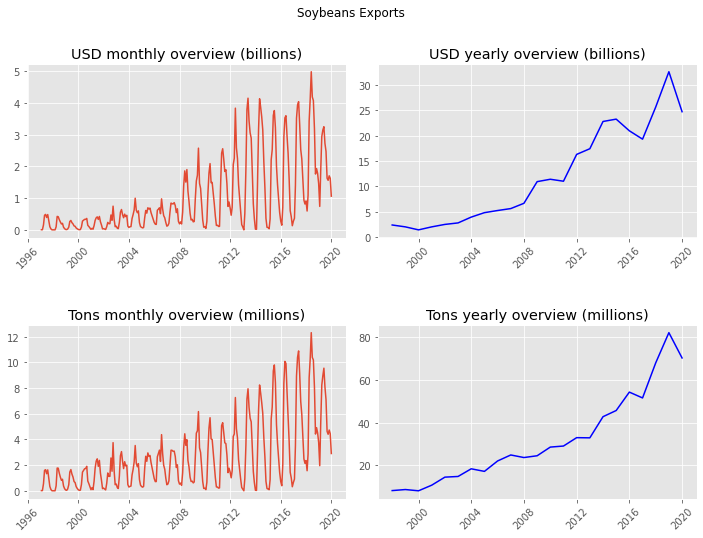

In [8]:
temp = dataset.loc[(dataset['type'] == 'Export') & (dataset['product'] == 'soybeans')]
xlabels = temp['year'].unique()

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle('Soybeans Exports')
plt.subplots_adjust(wspace = 0.1, hspace = 0.5)

ax1.plot(temp['usd'].resample('M').sum() / 1000000000)
ax1.title.set_text('USD monthly overview (billions)')
ax1.tick_params(axis='x', labelrotation = 45);

ax2.plot(temp['usd'].resample('Y').sum() / 1000000000, color = 'blue')
ax2.title.set_text('USD yearly overview (billions)')
ax2.tick_params(axis='x', labelrotation = 45);

ax3.plot(temp['tons'].resample('M').sum() / 1000000)
ax3.title.set_text('Tons monthly overview (millions)')
ax3.tick_params(axis='x', labelrotation = 45);

ax4.plot(temp['tons'].resample('Y').sum() / 1000000, color = 'blue')
ax4.title.set_text('Tons yearly overview (millions)')
ax4.tick_params(axis='x', labelrotation = 45);

## Soybean oil

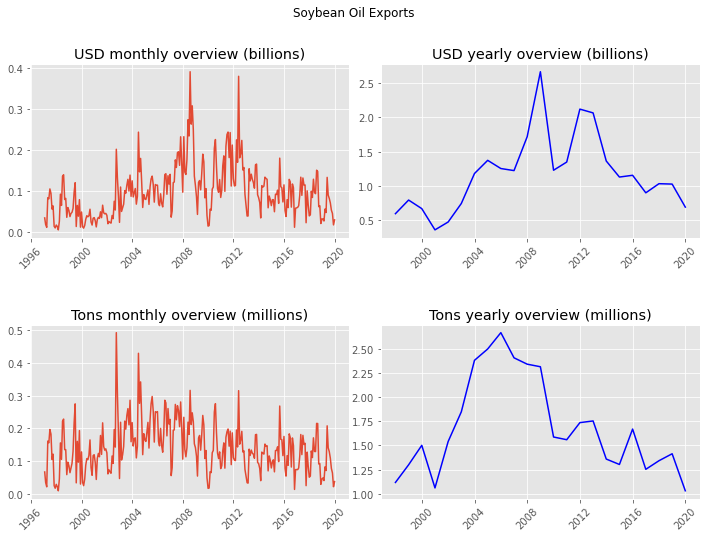

In [9]:
temp = dataset.loc[(dataset['type'] == 'Export') & (dataset['product'] == 'soybean_oil')]
xlabels = temp['year'].unique()

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle('Soybean Oil Exports')
plt.subplots_adjust(wspace = 0.1, hspace = 0.5)

ax1.plot(temp['usd'].resample('M').sum() / 1000000000)
ax1.title.set_text('USD monthly overview (billions)')
ax1.tick_params(axis='x', labelrotation = 45);

ax2.plot(temp['usd'].resample('Y').sum() / 1000000000, color = 'blue')
ax2.title.set_text('USD yearly overview (billions)')
ax2.tick_params(axis='x', labelrotation = 45);

ax3.plot(temp['tons'].resample('M').sum() / 1000000)
ax3.title.set_text('Tons monthly overview (millions)')
ax3.tick_params(axis='x', labelrotation = 45);

ax4.plot(temp['tons'].resample('Y').sum() / 1000000, color = 'blue')
ax4.title.set_text('Tons yearly overview (millions)')
ax4.tick_params(axis='x', labelrotation = 45);

## Soybean meal

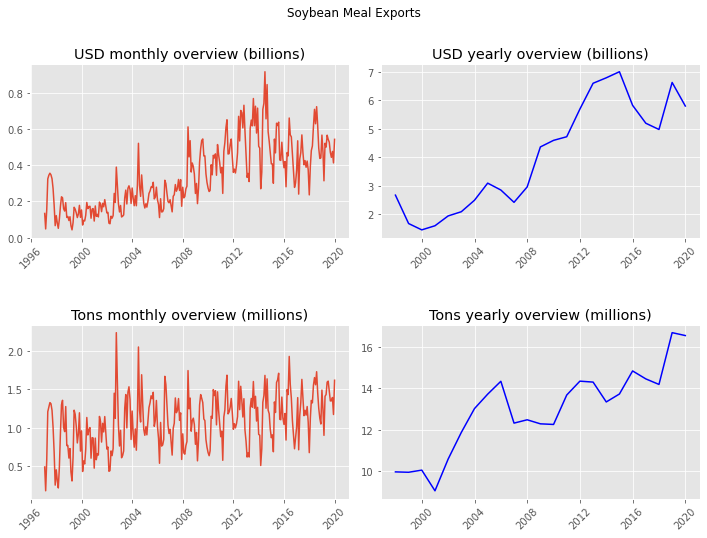

In [10]:
temp = dataset.loc[(dataset['type'] == 'Export') & (dataset['product'] == 'soybean_meal')]
xlabels = temp['year'].unique()

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize = (12, 8))
fig.suptitle('Soybean Meal Exports')
plt.subplots_adjust(wspace = 0.1, hspace = 0.5)

ax1.plot(temp['usd'].resample('M').sum() / 1000000000)
ax1.title.set_text('USD monthly overview (billions)')
ax1.tick_params(axis='x', labelrotation = 45);

ax2.plot(temp['usd'].resample('Y').sum() / 1000000000, color = 'blue')
ax2.title.set_text('USD yearly overview (billions)')
ax2.tick_params(axis='x', labelrotation = 45);

ax3.plot(temp['tons'].resample('M').sum() / 1000000)
ax3.title.set_text('Tons monthly overview (millions)')
ax3.tick_params(axis='x', labelrotation = 45);

ax4.plot(temp['tons'].resample('Y').sum() / 1000000, color = 'blue')
ax4.title.set_text('Tons yearly overview (millions)')
ax4.tick_params(axis='x', labelrotation = 45);

## Question 2 <a name = "question2"></a>

What are the 3 most important products exported by Brazil in the last 5 years?

In [11]:
# First we define a list with the last 5 years of our base
years = dataset['year'].unique()
years_last5 = years[-5:].copy()

# Pivot table adding by product and respecting some filters
ptable = dataset[(dataset['type'] == 'Export') &
  (dataset['year'].isin(years_last5))].pivot_table(index = 'product',
                                      #columns = 'usd',
                                      aggfunc = 'sum',
                                      values = 'usd')

*Viewing the ordered table makes it possible to answer the requested question*.

In [12]:
ptable.columns = ['usd billions']
ptable.apply(lambda x: x / 1000000000).round(2).sort_values(by = 'usd billions', ascending = False)[:3]

,usd billions
product,
soybeans,123.33
sugar,40.94
soybean_meal,28.41


*Therefore, the 3 most important products for Brazilian export in the last 5 years, according to our data, are soybeans, sugar and soybean meal*.

Question: would the results be different if we looked at the tons exported?

In [13]:
ptable = dataset[(dataset['type'] == 'Export') &
  (dataset['year'].isin(years_last5))].pivot_table(index = 'product',
                                      #columns = 'usd',
                                      aggfunc = 'sum',
                                      values = 'tons')

In [14]:
ptable.columns = ['tons (millions)']
ptable.apply(lambda x: x / (10 ** 6)).round(2).sort_values(by = "tons (millions)", ascending = False)[:3]

,tons (millions)
product,
soybeans,326.33
corn,144.60
sugar,120.03


*We can see that soybeans and sugar stand out both in terms of the value traded and the quantity of tons exported. However, when we look at the top 3 per ton, corn exports stand out. This is an important result, as Brazil is a world power in the export of this product.*

## Question 3 <a name = "question3"></a>

What are the main routes through which Brazil have been exporting ‘corn’ in the last few years? Are there differences in the relative importancem of routes depending on the product?

## What are the main routes through which Brazil have been exporting ‘corn’ in the last few years?

*To answer this question, we chose to present the tables summarizing the monetary value of exports. However, we noticed that if we set up the tables from the quantity of tons, the results would be the same: in Brazil, for the data presented, there is a leading role in exports by sea.*

In [15]:
# Exclusive dataframe for corn exports
cornExp_df = dataset.loc[(dataset['product'] == 'corn') & (dataset['type'] == 'Export')]

In [16]:
cm = sns.light_palette("blue", as_cmap = True)

ptable = cornExp_df.pivot_table(index = 'route',
                      values = 'usd',
                      columns = 'year',
                      aggfunc = 'sum')

ptable.apply(lambda x: x / (10 ** 9)).style.background_gradient(cmap = cm).set_precision(2)

year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
route,,,,,,,,,,,,,,,,,,,,,,,
Air,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ground,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.02,0.04,0.02,0.04,0.04,0.04,0.04,0.02,0.02,0.04,0.04,0.04,0.04
Other,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03
River,nan,nan,nan,nan,nan,0.00,0.00,0.01,nan,0.00,nan,nan,0.03,0.03,0.05,0.10,0.28,0.19,0.28,0.12,0.31,0.25,0.01
Sea,0.04,0.01,0.00,0.00,0.48,0.26,0.36,0.57,0.11,0.47,1.89,1.36,1.25,2.13,2.62,5.24,5.99,3.71,4.70,3.57,4.28,3.66,7.04


*Reading with the color gradient is very interesting for this type of analysis. We conclude that the main routes that the country has exported corn are mostly water routes, where the leadership is given by maritime transport. It is important to highlight that, although mild, in recent years we can see a highlight for land transportation.*

## Are there differences in the relative importancem of routes depending on the product?

*With the codes below, we can say that the answer to this question is no. Even for different products, we have a sovereignty of maritime transport in Brazilian exports.*

In [17]:
# We can repeat the exercise for the other products now,
# since visualization via color gradient proved to be efficient

# Defining product list
products = dataset['product'].unique().tolist()
products.remove('corn') # it is already done above

In [18]:
# Let's create a list with the pivot tables, to print with a loop

##### Datasets list, by product
aux = []
for produto in products:
    aux.append(dataset.loc[(dataset['product'] == produto) & (dataset['type'] == 'Export')])
    
##### Pivot tables list
ptables_list = []
for df in aux:
    ptable = df.pivot_table(index = 'route',
                      values = 'usd',
                      columns = 'year',
                      aggfunc = 'sum').apply(lambda x: x / (10 ** 9)).style.background_gradient(cmap = cm).set_precision(2)
    ptables_list.append(ptable)
    
# Adding the results as a whole to a dictionary
results = {}
for i in range(len(ptables_list)):
    results[products[i]] = ptables_list[i]

In [19]:
for product in products:
    print()
    print('-=' * 21)
    print(f'Results for {product} exports'.center(42))
    print('-=' * 21)
    display(results[product])


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
     Results for soybean_meal exports     
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
route,,,,,,,,,,,,,,,,,,,,,,,
Air,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.01,0.00,0.00,0.00
Ground,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Other,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan,0.00,nan,nan,nan,0.00,0.03
River,nan,0.02,0.02,0.01,0.00,nan,nan,0.00,0.01,0.01,nan,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan,nan,nan
Sea,2.67,1.65,1.43,1.58,1.94,2.09,2.49,3.08,2.84,2.41,2.96,4.36,4.59,4.72,5.69,6.59,6.79,7.00,5.82,5.18,4.97,6.62,5.76



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
     Results for soybean_oil exports      
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
route,,,,,,,,,,,,,,,,,,,,,,,
Air,0.00,0.00,0.00,nan,nan,0.00,nan,0.00,0.00,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00
Ground,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.02,0.01,0.02,0.02,0.03,0.02,0.02,0.02,0.02,0.02,0.02,0.04
Other,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.00,0.00
River,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sea,0.59,0.79,0.66,0.35,0.46,0.73,1.17,1.36,1.24,1.21,1.70,2.65,1.21,1.33,2.09,2.03,1.33,1.10,1.13,0.87,1.00,1.00,0.65



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
       Results for soybeans exports       
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
route,,,,,,,,,,,,,,,,,,,,,,,
Air,nan,0.00,0.00,0.00,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ground,0.00,0.01,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.02,0.01
Other,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,nan,nan,0.00,nan,nan,nan,nan,nan,nan,0.08,0.46
River,0.04,0.02,0.01,0.02,0.02,0.03,0.05,0.04,0.21,0.28,0.26,0.46,0.40,0.31,0.37,0.46,0.53,0.44,0.40,0.65,0.77,1.05,0.37
Sea,2.36,2.00,1.43,2.01,2.49,2.78,3.90,4.79,5.05,5.36,6.42,10.48,11.01,10.72,15.95,16.97,22.28,22.83,20.58,18.68,24.89,31.46,23.89



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        Results for sugar exports         
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


year,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
route,,,,,,,,,,,,,,,,,,,,,,,
Air,0.00,0.00,0.00,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Ground,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.01,0.05,0.04,0.03,0.04,0.03,0.04,0.06,0.05,0.06
Other,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01
River,0.00,nan,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.02,0.00,nan,0.00,0.00,0.00,0.00,0.00
Sea,0.71,0.83,0.73,0.43,0.86,0.97,0.78,1.11,1.52,2.22,1.96,1.81,2.38,3.43,3.32,12.58,11.75,9.34,7.53,10.34,11.31,6.43,5.04



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        Results for wheat exports         
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


year,2003,2004,2005,2006,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
route,,,,,,,,,,,,,,,,
Air,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00
Ground,nan,nan,nan,nan,nan,0.00,0.00,nan,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
Other,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Sea,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.59,0.34,0.09,0.35,0.12,0.10,0.04,0.11


# Question 4 <a name = "question4"></a>

Which countries have been the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years?

In [20]:
years_last3 = years_last5[-3:].copy()

## Corn

In [21]:
partner_imports = dataset.loc[(dataset['type'] == 'Import')
                             & (dataset['product'] == 'corn')
                             & (dataset['year'].isin(years_last3))].pivot_table(index = 'country',
                                                                               values = 'usd',
                                                                               aggfunc = 'sum')

partner_exports = dataset.loc[(dataset['type'] != 'Import')
                             & (dataset['product'] == 'corn')
                             & (dataset['year'].isin(years_last3))].pivot_table(index = 'country',
                                                                               values = 'usd',
                                                                               aggfunc = 'sum')

Top 10 partners from the corn imports (USD millions) point of view:

In [22]:
partner_imports.sort_values(by = 'usd', ascending = False).apply(lambda x: x / (10 ** 6)).round(2)[:10]

,usd
country,
Paraguay,374.16
Argentina,154.91
United States,20.83
Bolivia,2.50
Mexico,0.14
Spain,0.01
Brazil,0.00
Guatemala,0.00
Belgium,0.00


Top 10 partners from the corn exports (USD millions) point of view:

In [23]:
partner_exports.sort_values(by = 'usd', ascending = False).apply(lambda x: x / (10 ** 6)).round(2)[:10]

,usd
country,
Iran,2822.34
Japan,1574.98
Vietnam,1551.04
Egypt,1375.07
Spain,1335.77
South Korea,1024.57
Taiwan,815.57
Malaysia,696.33
Bangladesh,527.88


## Sugar

In [24]:
partner_imports = dataset.loc[(dataset['type'] == 'Import')
                             & (dataset['product'] == 'sugar')
                             & (dataset['year'].isin(years_last3))].pivot_table(index = 'country',
                                                                               values = 'usd',
                                                                               aggfunc = 'sum')

partner_exports = dataset.loc[(dataset['type'] != 'Import')
                             & (dataset['product'] == 'sugar')
                             & (dataset['year'].isin(years_last3))].pivot_table(index = 'country',
                                                                               values = 'usd',
                                                                               aggfunc = 'sum')

Top 10 partners from the sugar imports (USD millions) point of view:

In [25]:
partner_imports.sort_values(by = 'usd', ascending = False).apply(lambda x: x / (10 ** 6)).round(2)[:10]

,usd
country,
United States,3.31
Chile,0.61
Argentina,0.51
Italy,0.36
Netherlands,0.29
Germany,0.27
Switzerland,0.20
Guatemala,0.11
Paraguay,0.09


Top 10 partners from the sugar exports (USD millions) point of view:

In [26]:
partner_exports.sort_values(by = 'usd', ascending = False).apply(lambda x: x / (10 ** 6)).round(2)[:10]

,usd
country,
Algeria,2176.38
Bangladesh,2063.17
India,1696.09
United Arab Emirates,1538.40
Saudi Arabia,1380.46
Nigeria,1336.52
Iraq,1158.54
Malaysia,1039.03
Egypt,1010.58


# Question 5 <a name = "question5"></a>

For each of the products in the dataset, show the 5 most important states in terms of exports?

In [27]:
products = dataset['product'].unique()
results = {}
aux_df = []
aux_ptables = []

##### Lista de dataframes auxiliares
for product in products:
    aux = dataset.loc[(dataset['product'] == product) & (dataset['type'] == 'Export')]
    aux_df.append(aux)

##### Lista de pivot tables
for file in aux_df:
    aux = file.pivot_table(index = 'state',
                     values = 'usd',
                     aggfunc = 'sum')
    aux = aux.apply(lambda x: x / (10 ** 6)).round(2).sort_values(by = 'usd', ascending = False)[:5]
    aux_ptables.append(aux)

for i in range(len(products)):
    results[products[i]] = aux_ptables[i]

for product in products:
    print()
    print('-=' * 21)
    print(f'Results for {product} exports'.center(42))
    print('-=' * 21)
    display(results[product]) 


-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
         Results for corn exports         
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


,usd
state,
MT,28375.52
PR,9160.51
GO,5706.99
MS,3405.43
SP,1511.12



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
     Results for soybean_meal exports     
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


,usd
state,
MT,27994.54
PR,24649.96
RS,15007.39
GO,9421.43
BA,5439.27



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
     Results for soybean_oil exports      
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


,usd
state,
PR,11109.10
RS,6281.97
MT,5434.51
SC,1238.81
GO,855.92



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
       Results for soybeans exports       
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


,usd
state,
MT,80506.78
PR,48484.10
RS,46136.73
GO,21268.83
MS,13284.82



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        Results for sugar exports         
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


,usd
state,
SP,66211.86
MG,8559.40
PR,8270.78
AL,4826.42
MS,3219.03



-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
        Results for wheat exports         
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


,usd
state,
RS,1555.93
PR,183.94
SC,25.40
SP,2.27
MS,0.28


# Question 6 <a name = "question6"></a>

Now, we ask you to show your modelling skills. Feel free to use any type of modelling approach, but bear in mind that the modelling approach depends on the nature of your data, and so different models yield different estimates and forecasts. To help you out in this task we also provide you with a dataset of possible covariates (.xlsx). They all come from public sources (IMF, World Bank) and are presented in index number format.

## Question: What should be the total brazilian soybeans, soybean_meal, and corn export forecasts, in tons, for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.

In [28]:
# First, let's import the file sent with the covariates.
filePath = r"C:\Users\leona\Downloads\Challenge_4i\covariates.xlsx"
covariates = pd.read_excel(filePath)

In [29]:
covariates.head()

,year,price_soybeans,price_corn,price_soybean_meal,gdp_china,gdp_iran,gpd_netherlands,gdp_spain,gdp_thailand,gdp_world,gdp_egypt,gdp_japan,gdp_vietnam
0,1979,NaN,NaN,NaN,100.000000,100.000000,NaN,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,1980,100.000000,100.000000,100.000000,107.900000,81.200000,100.000000,101.200000,104.600000,102.100000,103.400000,103.200000,96.500000
2,1981,98.525508,103.888308,99.805440,113.402900,74.216800,99.500000,100.795200,110.771400,104.039900,105.674800,107.534400,102.097000
3,1982,83.406192,85.986430,86.596956,123.609161,83.939201,98.206500,102.004742,116.753056,104.664139,113.389060,111.083035,110.468954
4,1983,97.851743,108.168059,98.663318,136.958950,95.522811,99.974217,103.738823,123.291227,107.594735,123.480687,114.970941,118.312250


In [30]:
covariates['year'].unique()

array([1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030], dtype=int64)

In [31]:
covariates.index = covariates['year']

We can see that the covariate base is annual. Therefore, we need to make a transformation in our previous base so that our dependent variable is at the same frequency.

In [32]:
dataset.head()

,date,product,state,country,type,route,tons,usd,month,year,year_month
date,,,,,,,,,,,
1997-01-01,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0,1,1997,1997_1
1997-01-01,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0,1,1997,1997_1
1997-01-01,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1,1997,1997_1
1997-01-01,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1,1997,1997_1
1997-01-01,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0,1,1997,1997_1


In [33]:
annual_dataset = dataset.loc[dataset['type'] == 'Export'].pivot_table(index = 'year',
                                    columns = 'product',
                                    values = 'tons',
                                    aggfunc = 'sum')
annual_dataset

product,corn,soybean_meal,soybean_oil,soybeans,sugar,wheat
year,,,,,,
1997,3.568950e+05,9.965945e+06,1117451.178,8.195025e+06,2.521670e+06,NaN
1998,6.033643e+03,9.947875e+06,1300080.071,8.679492e+06,3.535548e+06,NaN
1999,5.321076e+03,1.005007e+07,1501525.634,8.096035e+06,4.223416e+06,NaN
2000,5.554756e+03,9.055435e+06,1060952.727,1.072512e+07,2.151825e+06,NaN
2001,5.410199e+06,1.058249e+07,1540760.712,1.448690e+07,4.071271e+06,NaN
2002,2.727390e+06,1.186623e+07,1848337.887,1.480649e+07,5.722400e+06,NaN
2003,3.509735e+06,1.301340e+07,2381000.412,1.839112e+07,4.539850e+06,1.500
2004,4.892188e+06,1.370836e+07,2498384.984,1.718609e+07,6.168796e+06,3.000
2005,1.069452e+06,1.432846e+07,2667365.968,2.206341e+07,6.559778e+06,1.700


In [34]:
# In this part of the code we will filter on the covariate basis only the years that are also
# on the basis of the dependent variables.
years = annual_dataset.index.tolist()
covariates_f = covariates.loc[covariates['year'].isin(years)]

*Additionally, we have to make a forecast for the period from 2020 to 2030 at the end of the question. We will create a dataframe with the covariates in this period. The idea is that this dataframe works as a test case, after obtaining the coefficients of our model.*

In [35]:
years2 = covariates['year'].unique()[-11:]
years2

array([2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
      dtype=int64)

In [36]:
covariates_forecast = covariates.loc[covariates['year'].isin(years2)]

## Model for soybeans <a name = "soybeans model"></a>

In [37]:
y = annual_dataset['soybeans']
y

year
1997    8.195025e+06
1998    8.679492e+06
1999    8.096035e+06
2000    1.072512e+07
2001    1.448690e+07
2002    1.480649e+07
2003    1.839112e+07
2004    1.718609e+07
2005    2.206341e+07
2006    2.486963e+07
2007    2.366474e+07
2008    2.449940e+07
2009    2.856070e+07
2010    2.905343e+07
2011    3.297554e+07
2012    3.289181e+07
2013    4.279507e+07
2014    4.568718e+07
2015    5.430348e+07
2016    5.157381e+07
2017    6.800659e+07
2018    8.214744e+07
2019    7.030014e+07
Name: soybeans, dtype: float64

*To motivate, let's view a correlogram of the variables. Here we are building the figure using the dependent variable and all the covariate dataframe columns.*

In [38]:
aux = pd.concat([covariates_f, y], axis = 1)

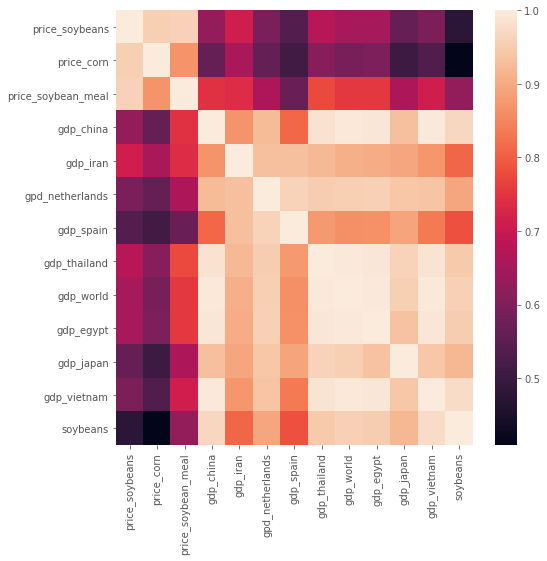

In [39]:
figure = plt.figure(figsize = (8, 8))
sns.heatmap(aux.iloc[:, 1:].corr())

*We note that there is a negative correlation between commodity prices and GDPs. We will build our covariate matrix X with all variables, except for world GDP.*

In [40]:
X = covariates_f.drop(['gdp_world', 'year'], axis = 1)

In [41]:
X.shape

(23, 11)

In [42]:
y.shape

(23,)

In [43]:
from sklearn.ensemble.forest import RandomForestRegressor

c:\users\leona\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [44]:
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

# let's get the labels and features in order to run our 
# model fitting
labels = y
features = X

# Fit the RF model with features and labels.
rgr = RF_Model.fit(features, labels)
y_hat = rgr.predict(X)

results = pd.DataFrame({'y': y, 'y_hat': y_hat})

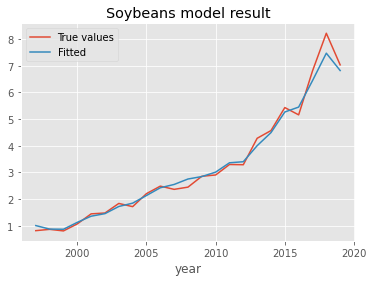

In [45]:
results.apply(lambda x: x / (10 ** 7)).plot()
plt.title('Soybeans model result')
plt.legend(['True values', 'Fitted']);

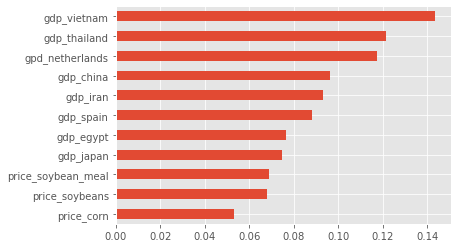

In [46]:
feat_importances = pd.Series(rgr.feature_importances_, index = X.columns)
feat_importances.sort_values().plot(kind='barh');

In [47]:
forecast_10years = pd.Series(rgr.predict(covariates_forecast.drop(['year', 'gdp_world'], axis = 1)))
forecast_10years.index = years2

In [48]:
print('-=' * 20)
print('Forecast for 2020-2030 period'.center(40))
print('-=' * 20)
display(forecast_10years.apply(lambda x: x / (10 ** 6)).round(2))
print()
print('The values are expressed in millions of tons.')

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
     Forecast for 2020-2030 period      
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


2020    52.12
2021    63.08
2022    70.59
2023    70.97
2024    70.78
2025    68.70
2026    68.37
2027    68.37
2028    68.12
2029    68.12
2030    67.73
dtype: float64


The values are expressed in millions of tons.


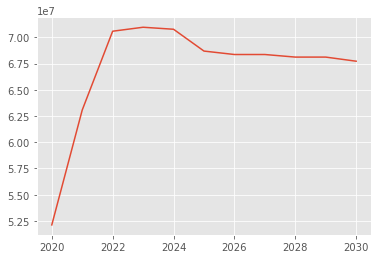

In [49]:
plt.plot(forecast_10years)

*Now we can take advantage of the developed routine and make models for other products.*

## Model for soybean meal <a name = "soybean meal model"></a>

In [50]:
y = annual_dataset['soybean_meal']

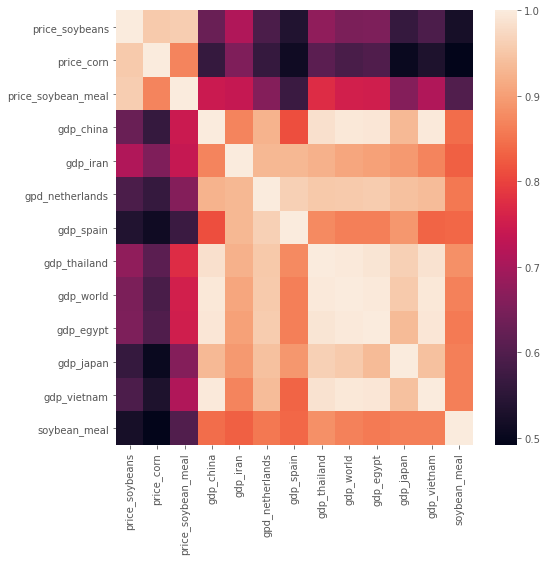

In [51]:
aux = pd.concat([covariates_f, y], axis = 1)
figure = plt.figure(figsize = (8, 8))
sns.heatmap(aux.iloc[:, 1:].corr())

In [52]:
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

# let's get the labels and features in order to run our 
# model fitting
labels = y
features = X

# Fit the RF model with features and labels.
rgr = RF_Model.fit(features, labels)
y_hat = rgr.predict(X)

results = pd.DataFrame({'y': y, 'y_hat': y_hat})

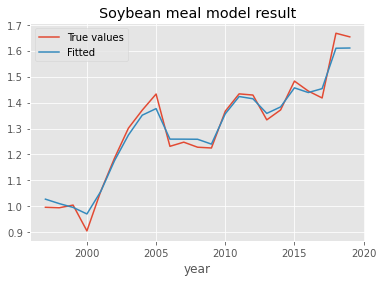

In [53]:
results.apply(lambda x: x / (10 ** 7)).plot()
plt.title('Soybean meal model result')
plt.legend(['True values', 'Fitted']);

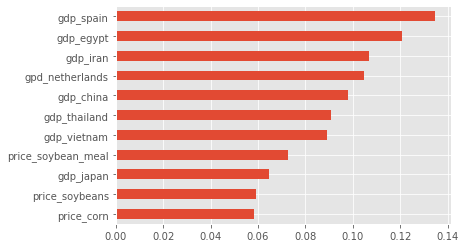

In [54]:
feat_importances = pd.Series(rgr.feature_importances_, index = X.columns)
feat_importances.sort_values().plot(kind='barh');

In [55]:
forecast_10years = pd.Series(rgr.predict(covariates_forecast.drop(['year', 'gdp_world'], axis = 1)))
forecast_10years.index = years2

In [56]:
print('-=' * 20)
print('Forecast for 2020-2030 period'.center(40))
print('-=' * 20)
display(forecast_10years.apply(lambda x: x / (10 ** 6)).round(2))
print()
print('The values are expressed in millions of tons.')

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
     Forecast for 2020-2030 period      
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


2020    14.62
2021    15.27
2022    15.75
2023    15.96
2024    15.84
2025    15.72
2026    15.71
2027    15.71
2028    15.71
2029    15.71
2030    15.71
dtype: float64


The values are expressed in millions of tons.


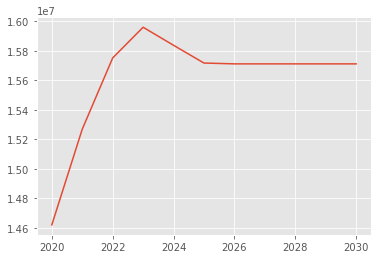

In [57]:
plt.plot(forecast_10years)

## Corn model <a name = "corn model"></a>

In [58]:
y = annual_dataset['corn']

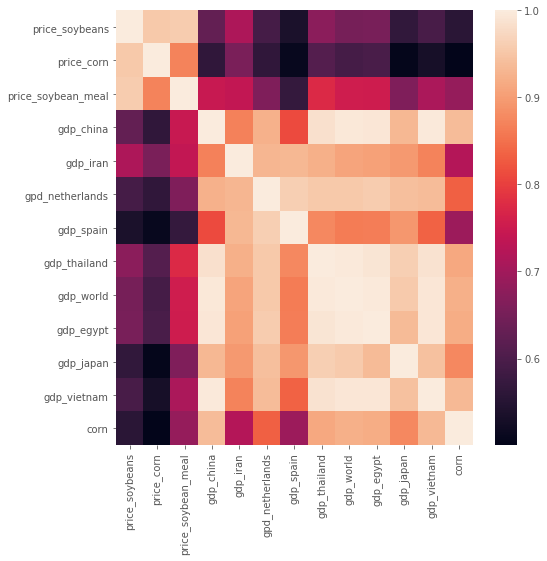

In [59]:
aux = pd.concat([covariates_f, y], axis = 1)
figure = plt.figure(figsize = (8, 8))
sns.heatmap(aux.iloc[:, 1:].corr())

In [60]:
# build our RF model
RF_Model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

# let's get the labels and features in order to run our 
# model fitting
labels = y
features = X

# Fit the RF model with features and labels.
rgr = RF_Model.fit(features, labels)
y_hat = rgr.predict(X)

results = pd.DataFrame({'y': y, 'y_hat': y_hat})

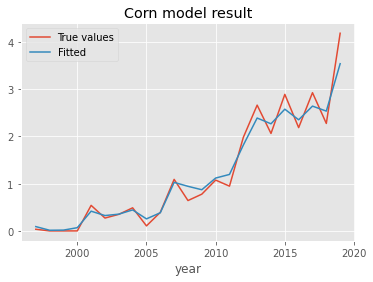

In [61]:
results.apply(lambda x: x / (10 ** 7)).plot()
plt.title('Corn model result')
plt.legend(['True values', 'Fitted']);

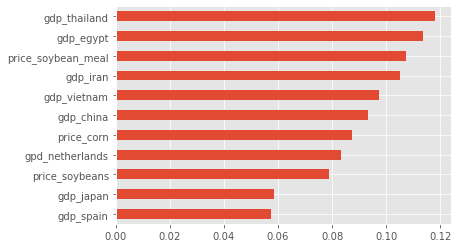

In [62]:
feat_importances = pd.Series(rgr.feature_importances_, index = X.columns)
feat_importances.sort_values().plot(kind='barh');

In [63]:
forecast_10years = pd.Series(rgr.predict(covariates_forecast.drop(['year', 'gdp_world'], axis = 1)))
forecast_10years.index = years2

In [64]:
print('-=' * 20)
print('Forecast for 2020-2030 period'.center(40))
print('-=' * 20)
display(forecast_10years.apply(lambda x: x / (10 ** 6)).round(2))
print()
print('The values are expressed in millions of tons.')

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
     Forecast for 2020-2030 period      
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


2020    24.71
2021    30.57
2022    31.63
2023    30.69
2024    32.80
2025    31.31
2026    31.48
2027    31.48
2028    31.11
2029    31.11
2030    31.11
dtype: float64


The values are expressed in millions of tons.


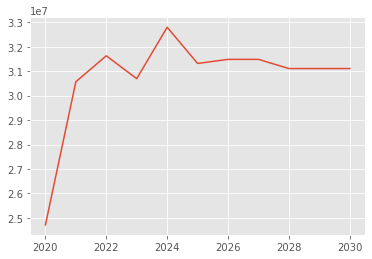

In [65]:
plt.plot(forecast_10years)